In [ ]:
# !pip install -r requirements.txt

In [1]:
!pip install pydot

In [2]:
!pip install numpy matplotlib scipy opencv-python scikit-image

In [3]:
!pip install opencv-python

In [4]:
!pip install graphviz

In [5]:
!pip install pandas

In [6]:
!pip install h5py

In [7]:
!pip install matplotlib

In [8]:
!pip install flask

In [2]:
!python.exe -m pip install --upgrade pip

     ---------------------------------------- 1.8/1.8 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3


In [4]:
!pip install tensorflow==2.12

In [5]:
!pip install deepface

  Using cached deepface-0.0.93-py3-none-any.whl.metadata (30 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached flask_cors-5.0.1-py3-none-any.whl.metadata (961 bytes)
  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
  Using cached fire-0.7.0.tar.gz (87 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 k

In [6]:
!pip install deepface==0.0.75

  Using cached deepface-0.0.75-py3-none-any.whl.metadata (19 kB)
  Attempting uninstall: deepface
    Found existing installation: deepface 0.0.93
    Uninstalling deepface-0.0.93:
      Successfully uninstalled deepface-0.0.93


In [19]:
!pip install --upgrade deepface

  Using cached deepface-0.0.93-py3-none-any.whl.metadata (30 kB)
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
Using cached deepface-0.0.93-py3-none-any.whl (108 kB)
Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: deepface
    Found existing installation: deepface 0.0.75
    Uninstalling deepface-0.0.75:
      Successfully uninstalled deepface-0.0.75


In [53]:
!pip install opencv-python deepface

In [60]:
!pip install -U deepface

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing import image
from time import sleep
import cv2
import numpy as np

# Load pre-trained face detection model and emotion detection model
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
classifier = load_model('./Emotion_Detection.h5')

# List of emotion labels
class_labels = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise','Fear']

# Start webcam feed
cap = cv2.VideoCapture(0)

while True:
    # Capture a single frame
    ret, frame = cap.read()
    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)
    labels = []
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray]) != 0:
            roi = roi_gray.astype('float') / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

            # Make a prediction on the ROI and lookup the class
            preds = classifier.predict(roi)[0]
            print("\nprediction = ", preds)
            label = class_labels[preds.argmax()]
            print("\nprediction max = ", preds.argmax())
            print("\nlabel = ", label)
            label_position = (x, y)
            cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
        else:
            cv2.putText(frame, 'No Face Found', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
        print("\n\n")

    # Display the video feed with detected emotions
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 885ms/step

prediction =  [0.04251131 0.0149208  0.8699814  0.06520579 0.00738074]

prediction max =  2

label =  Neutral



1/1 [==============================] - 0s 41ms/step

prediction =  [0.07345932 0.01574512 0.78262436 0.12098955 0.00718168]

prediction max =  2

label =  Neutral



1/1 [==============================] - 0s 39ms/step

prediction =  [0.06433525 0.01245585 0.811523   0.10486478 0.00682108]

prediction max =  2

label =  Neutral



1/1 [==============================] - 0s 43ms/step

prediction =  [0.05576092 0.01075136 0.8382572  0.08781581 0.00741473]

prediction max =  2

label =  Neutral



1/1 [==============================] - 0s 41ms/step

prediction =  [0.05584083 0.01430665 0.83398145 0.08818915 0.007682  ]

prediction max =  2

label =  Neutral



1/1 [==============================] - 0s 34ms/step

prediction =  [0.05918176 0.01212922 0.82832247 0.09338854 0.00697804]

prediction max =  2

label =  Neutral



1/1

In [13]:
# Code for CNN Model and model summary
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preparation
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('C://Users//Zainab//emotion_detection//dataset//training_set//train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1593 images belonging to 2 classes.


Epoch 1/25
50/50 [==============================] - 29s 530ms/step - loss: 0.0159 - accuracy: 0.9799 - val_loss: 3.8104e-11 - val_accuracy: 1.0000
Epoch 2/25
50/50 [==============================] - 28s 573ms/step - loss: 2.9987e-11 - accuracy: 1.0000 - val_loss: 2.9418e-11 - val_accuracy: 1.0000
Epoch 3/25
50/50 [==============================] - 26s 519ms/step - loss: 2.9368e-11 - accuracy: 1.0000 - val_loss: 2.9364e-11 - val_accuracy: 1.0000
Epoch 4/25
50/50 [==============================] - 26s 523ms/step - loss: 2.9364e-11 - accuracy: 1.0000 - val_loss: 2.9363e-11 - val_accuracy: 1.0000
Epoch 5/25
50/50 [==============================] - 27s 553ms/step - loss: 2.9363e-11 - accuracy: 1.0000 - val_loss: 2.9363e-11 - val_accuracy: 1.0000
Epoch 6/25
50/50 [==============================] - 27s 551ms/step - loss: 2.9362e-11 - accuracy: 1.0000 - val_loss: 2.9362e-11 - val_accuracy: 1.0000
Epoch 7/25
50/50 [==============================] - 538s 11s/step - loss: 2.9362e-11 - accuracy: 1

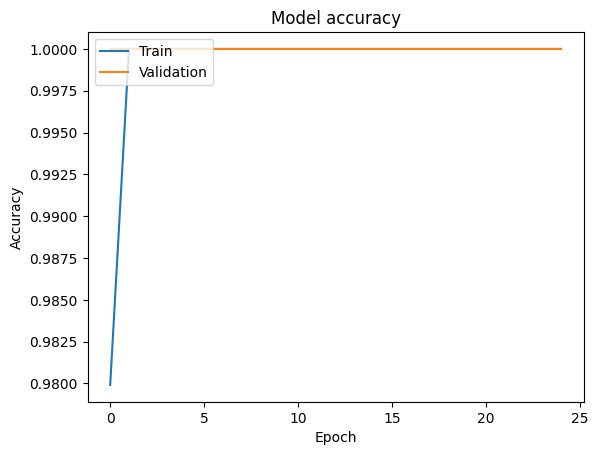

In [15]:
import matplotlib.pyplot as plt

# Calculate steps_per_epoch
steps_per_epoch = len(training_set)

# Training the model
history = model.fit(training_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=25,
                    validation_data=training_set,
                    validation_steps=len(training_set))

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = 'C://Users//Zainab//emotion_detection//dataset//training_set'
validation_data_dir = 'C://Users//Zainab//emotion_detection//dataset//csv//valid'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
validation_set = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Check the class indices
print(training_set.class_indices)

Found 1826 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
{'test': 0, 'train': 1, 'valid': 2}


In [17]:
# Displaying training and validation accuracy
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100

print(f'Training Accuracy: {train_acc:.2f}%')
print(f'Validation Accuracy: {val_acc:.2f}%')

Training Accuracy: 100.00%
Validation Accuracy: 100.00%
